In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [6]:
df=pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [7]:
print(df.info())
print("Missing value\n",df.isnull().sum())
print("Summary\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
Missing value
 ID                    0
Age         

In [11]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True)

In [13]:
x=df.drop(columns=['Personal Loan'])
y=df['Personal Loan']
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=42)

In [15]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pred=logistic.predict(x_test)
y_prob=logistic.predict_proba(x_test)[:,1]

In [18]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))
print("Classification\n",classification_report(y_test,y_pred))
roc=roc_auc_score(y_test,y_prob)
print("ROC:",roc)

Confusion Matrix
 [[883  12]
 [ 34  71]]
Classification
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000

ROC: 0.9683213620643789


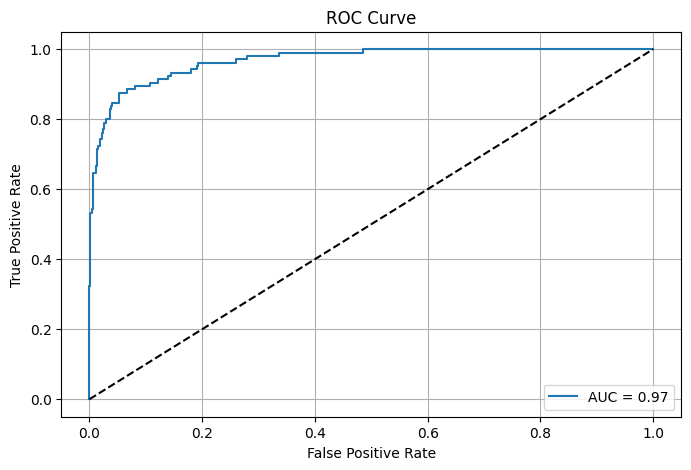

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
feature=pd.DataFrame({
'feature':x.columns,
'coefficient':logistic.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)
print(" Prediction\n:")
print(feature)

 Prediction
:
               feature  coefficient
2               Income     2.392837
5            Education     1.337462
8           CD Account     0.893413
3               Family     0.815207
10          CreditCard    -0.551193
1           Experience     0.409188
9               Online    -0.302855
0                  Age    -0.280982
7   Securities Account    -0.264073
4                CCAvg     0.186923
6             Mortgage     0.055666
